In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [62]:
data1 = [17,13,12,15,16,14,16,16,18,19]
data2 = [94,73,59,80,93,85,66,79,77,91]

[17, 13, 12, 15, 16, 14, 16, 16, 18, 19]

In [20]:
mean1 = np.mean(data1)
mean1

15.6

In [81]:
mean2 = np.mean(data2)
mean2

79.7

In [202]:
data1_regression = []
for x in data1:
    regress = x - mean1
    data1_regression.append(regress)

In [201]:
data2_regression = []
for x in data2:
    regress = x - mean2
    data2_regression.append(regress)

In [297]:
data1_regression_square = []
for x in data1:
    regress_square = ( x - mean1 ) ** 2
    data1_regression_square.append(regress_square)


In [298]:
data2_regression_square = []
for x in data2:
    regress_square = ( x - mean2 ) ** 2
    data2_regression_square.append(regress_square)


In [82]:
d1 = np.sum(data1_regression_square)
d1

42.4

In [83]:
d2 = np.sum(data2_regression_square)
d2

1206.1

In [299]:
multiplication_of_regress = []
for i in range(0 ,len(data1_regression_square) ):
    c = data1_regression[i] * data2_regression[i]
    multiplication_of_regress.append(c)

multiplication_of_regress

[20.02,
 17.420000000000005,
 74.52,
 -0.1799999999999982,
 5.320000000000004,
 -8.479999999999993,
 -5.480000000000006,
 -0.28000000000000136,
 -6.4800000000000075,
 38.419999999999995]

In [87]:
c1 = np.sum(multiplication_of_regress)
c1

134.79999999999998

In [94]:
pearson_correlation_coefficient = c1 / ((d1 * d2)**0.5)
pearson_correlation_coefficient

0.5960947613894624

In [106]:
sy = (d2 / (len(data1)-1) ) ** 0.5 
sx = (d1 / (len(data1)-1) ) ** 0.5 
b = pearson_correlation_coefficient * sy / sx
b

3.1792452830188678

In [105]:
a = np.mean(data2) - b * np.mean(data1)

30.103773584905667

In [137]:
x = np.linspace(1,20,20)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [138]:
# linear fucntion

y_score = []
for i in range(0,20):
    y = 3.179 * i + 30.1031
    y_score.append(y)

y_score

[30.1031,
 33.2821,
 36.4611,
 39.640100000000004,
 42.8191,
 45.9981,
 49.177099999999996,
 52.3561,
 55.5351,
 58.7141,
 61.893100000000004,
 65.0721,
 68.2511,
 71.4301,
 74.6091,
 77.7881,
 80.9671,
 84.1461,
 87.32509999999999,
 90.5041]

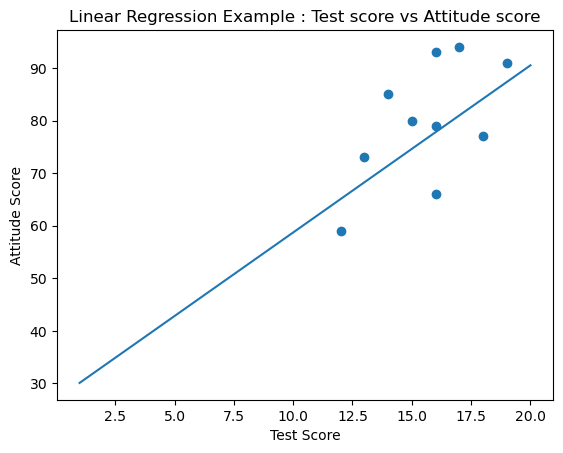

In [141]:
plt.plot(x, y_score)
plt.title('Linear Regression Example : Test score vs Attitude score')
plt.xlabel('Test Score')
plt.ylabel('Attitude Score')
plt.scatter(data1,data2)
plt.show()

In [441]:
data_raw = { 0 : (80,90,100,110,120,130,140,150,160,170), 1 : (9,8,7,9,8,7,9,8,6,7)}
data = pd.DataFrame( data_raw)

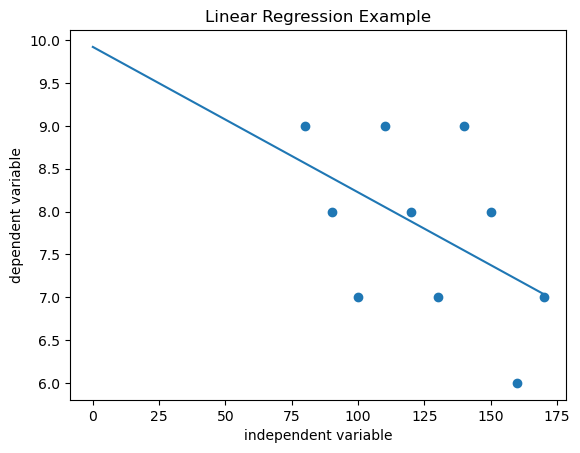

Pearson Correaltion Coefficient is -0.49746833816309094
    The linear regression equation is y = -0.01696969696969697x + 9.921212121212122
    


In [440]:
data_regression = {}
data_regression_square = {}
total_data_regression_square = {}
for i in range(0,2):
    data_regression[i] = []
    data_regression_square[i] = []
    for x in data.loc[:,i]:
        regress = x - np.mean(data.loc[:,i])
        regress_square = ( x - np.mean(data.loc[:,i]) ) ** 2
        data_regression[i].append(regress)
        data_regression_square[i].append(regress_square)
    total_data_regression_square[i] = np.sum(data_regression_square[i])

multiplication_of_regress = []
for j in range(0,1):
    for y in range(0, len(data_regression[j])):
        multiply_2_regress = data_regression[j][y] * data_regression[j+1][y]
        multiplication_of_regress.append(multiply_2_regress)
    sum_of_multiplication = np.sum(multiplication_of_regress)
    pearson_correlation_coefficient = sum_of_multiplication / ( (np.sum(data_regression_square[j]) * np.sum(data_regression_square[j+1]) )** 0.5)
    sy = ((np.sum(data_regression_square[j+1])) / (len(data_regression_square[j+1])-1))  ** 0.5 
    sx = ((np.sum(data_regression_square[j] ))/ (len(data_regression_square[j])-1))  ** 0.5 
    b = pearson_correlation_coefficient * sy / sx
    a = np.mean(data.loc[:,j+1]) - b * np.mean(data.loc[:,j])
    x = np.linspace(0,max(data.loc[:,j]),20) 
    y_score = []
    for k in x:
        y = b * k + a
        y_score.append(y)
    plt.plot(x, y_score)
    plt.title('Linear Regression Example')
    plt.xlabel('independent variable')
    plt.ylabel('dependent variable')
    plt.scatter(data.loc[:,j],data.loc[:,j+1])
    plt.show()
    
text =     f"""Pearson Correaltion Coefficient is {pearson_correlation_coefficient}
    The linear regression equation is y = {b}x + {a}
    """

print(text)